## Solve Differential Equations in Python

![Solve with ODEINT](https://apmonitor.com/pdc/uploads/Main/solve_odeint.png)

See https://apmonitor.com/pdc for [source code](https://apmonitor.com/pdc/index.php/Main/SolveDifferentialEquations) and additional material.

Differential equations are solved in Python with the Scipy.integrate package using function __odeint__ or __solve_ivp__. Another Python package that solves differential equations is [GEKKO](https://gekko.readthedocs.io/en/latest/). See this [link for the same tutorial in GEKKO](https://apmonitor.com/pdc/Main/PythonDifferentialEquations) versus ODEINT. ODEINT requires three inputs:

```python
y = odeint(model, y0, t)
```

__model__: Function name that returns derivative values at requested y and t values as dydt = model(y,t)

__y0__: Initial conditions of the differential states

__t__: Time points at which the solution should be reported. Additional internal points are often calculated to maintain accuracy of the solution but are not reported.

## Example Problem

An example of using _odeint_ is with the following differential equation with parameter $k=0.3$, the initial condition $y_0=5$ and the following differential equation.

$\frac{dy(t)}{dt} = -k \; y(t)$

The Python code first imports the needed Numpy, Scipy, and Matplotlib packages. The model, initial conditions, and time points are defined as inputs to _odeint_ to numerically calculate $y(t)$.

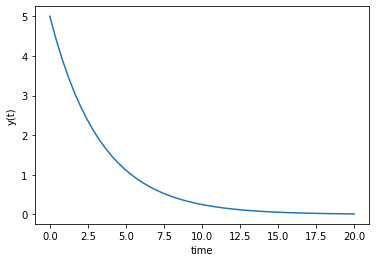

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## Additional Input Arguments

An optional fourth input is _args_ that allows additional information to be passed into the _model_ function. The _args_ input is a tuple sequence of values. The argument $k$ is now an input to the _model_ function by including an addition argument.

```python
y = odeint(model, y0, t, args)
```

__args__: Additional inputs to the model.

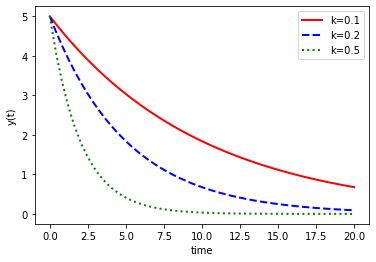

In [3]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# function that returns dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# initial condition
y0 = 5

# time points
t = np.linspace(0,20)

# solve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plot results
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('time')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## Exercises

Find a numerical solution to the following differential equations with the associated initial conditions. Expand the requested time horizon until the solution reaches a steady state. Show a plot of the states ($x(t)$ and/or $y(t)$). Report the final value of each state as $t \to \infty$.

## Problem 1

$\frac{dy(t)}{dt} = -y(t) + 1$

$y(0) = 0$

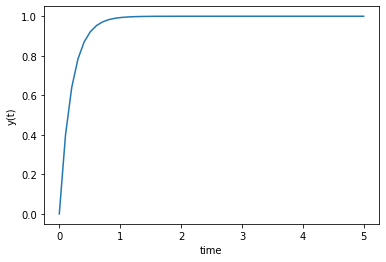

In [7]:
# function that returns dy/dt
def model(y,t):
    dydt = 5*(1.0 - y)
    return dydt

# initial condition
y0 = 0

# time points
t = np.linspace(0,5)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.show()

## Problem 2

$5 \; \frac{dy(t)}{dt} = -y(t) + u(t)$

$y(0) = 1$

$u$ steps from $0$ to $2$ at $t=10$

In [1]:
# function that returns dy/dt
def model(y,t):
    # u steps from 0 to 2 at t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

# initial condition
y0 = 1

# time points
t = np.linspace(0,40,1000)

# solve ODE
y = odeint(model,y0,t)

# plot results
plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

NameError: ignored

## Problem 3

Solve for $x(t)$ and $y(t)$ and show that the solutions are equivalent.

$\frac{dx(t)}{dt} = 3 \; exp(-t)$

$\frac{dy(t)}{dt} = 3 - y(t)$

$x(0) = 0$

$y(0) = 0$

In [ ]:
# function that returns dz/dt
def model(z,t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# time points
t = np.linspace(0,5)

# solve ODE
z = odeint(model,z0,t)

# plot results
plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

## Problem 4

$2 \; \frac{dx(t)}{dt} = -x(t) + u(t)$

$5 \; \frac{dy(t)}{dt} = -y(t) + x(t)$

$u = 2 \, S(t-5)$

$x(0) = 0$

$y(0) = 0$

where $S(t-5)$ is a step function that changes from zero to one at $t=5$. When it is multiplied by two, it changes from zero to two at that same time, $t=5$.

In [ ]:
# function that returns dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

# initial condition
z0 = [0,0]

# number of time points
n = 401

# time points
t = np.linspace(0,40,n)

# step input
u = np.zeros(n)
# change to 2.0 at time = 5.0
u[51:] = 2.0

# store solution
x = np.empty_like(t)
y = np.empty_like(t)
# record initial conditions
x[0] = z0[0]
y[0] = z0[1]

# solve ODE
for i in range(1,n):
    # span for next time step
    tspan = [t[i-1],t[i]]
    # solve for next step
    z = odeint(model,z0,tspan,args=(u[i],))
    # store solution for plotting
    x[i] = z[1][0]
    y[i] = z[1][1]
    # next initial condition
    z0 = z[1] 

# plot results
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()